# Instalar dash

In [8]:
%pip install dash

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
%pip install dash-bootstrap-components

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Instalar Geopandas y Geopy

In [10]:
%pip install geopandas


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
%pip install geopy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Libreries

In [12]:
import mysql.connector
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker # per poder utilitzar FuncFormatter i aplicar format a la barra
from matplotlib.ticker import FuncFormatter # per poder utilitzar el separador de milersimport geopandas as gpd

from geopy.geocoders import Nominatim
import geopandas as gpd
from shapely.geometry import Point



# connectar

In [13]:
db_connection = mysql.connector.connect(
    user='EquipoG',
    password = 'E1q2u3i4p5oG',
    database='Equip_G',
    host = "212.227.90.6")

cursor = db_connection.cursor()
cursor.execute("SHOW TABLES")
MySQL_tables = [table[0] for table in cursor.fetchall()]

DataFrames = {}
cursor = db_connection.cursor(dictionary=True)
for table in MySQL_tables:
    cursor.execute(f"SELECT * FROM {table}")
    DataFrames[f"df{table}"] = pd.DataFrame(cursor.fetchall())

print(DataFrames.keys())
locals().update(DataFrames)

cursor.close()
db_connection.close()


dict_keys(['dfTourist_Accommodation'])


# Funciones

## Función para añadir el símbolo € a los valores del eje

In [14]:
def euro_formatter(x, pos):
    return f"{x:,.0f}€"  # Format amb 0 

## Función para formatear el eje y con separador de miles

In [15]:
def formato_miles(x, pos):
    return f'{int(x):,}'

# Establecer paleta y estilo

In [16]:
sns.set_style("darkgrid")
sns.set_palette("tab10") 

# 01 EDA centrado en Márqueting y Comunicación
    Es para un negocio de alquiler de alojamientos turísticos

## 001 Mostrar el head() de cada DataFrame cargado para ver datos

In [17]:
for table_name, df in DataFrames.items():
    print(f"Head of {table_name}:")
    print(df.head())
    print("\n")


Head of dfTourist_Accommodation:
   apartment_id                                               name  \
0         11964                                 A ROOM WITH A VIEW   
1         21853                               Bright and airy room   
2         32347  Explore Cultural Sights from a Family-Friendly...   
3         35379                  Double 02 CasanovaRooms Barcelona   
4         35801                  Can Torras Farmhouse Studio Suite   

                                         description  host_id  \
0  Private bedroom in our attic apartment. Right ...    45553   
1  We have a quiet and sunny room with a good vie...    83531   
2  Open French doors and step onto a plant-filled...   139939   
3  Room at a my apartment. Kitchen and 2 bathroom...   152232   
4  Lay in bed & watch sunlight change the mood of...   153805   

                neighbourhood_name neighbourhood_district        room_type  \
0                           Centro                   None     Private room   

## 002 Análisis Descriptivo
    Resumen descriptivo de los datos

### 002-1 Para variables numéricas

In [18]:
print(df.describe()) 

       apartment_id       host_id  accommodates         beds        price  \
count  7.001000e+03  7.001000e+03   7001.000000  6998.000000  6870.000000   
mean   1.511978e+07  6.218673e+07      4.351807     3.013575  1011.098108   
std    7.715578e+06  5.747094e+07      2.620646     2.330849   845.975377   
min    1.196400e+04  1.070400e+04      1.000000     0.000000    60.000000   
25%    8.749646e+06  1.050015e+07      2.000000     1.000000   450.000000   
50%    1.673706e+07  4.261380e+07      4.000000     2.000000   750.000000   
75%    2.146321e+07  1.062896e+08      6.000000     4.000000  1230.000000   
max    2.724512e+07  3.365242e+08     29.000000    30.000000  6071.000000   

       minimum_nights  maximum_nights  availability_30  availability_60  \
count     7001.000000     7001.000000      7001.000000      7001.000000   
mean         4.424939      759.467647        12.277389        27.419940   
std         10.669575      497.964843        11.510798        22.413425   
min   

### 002-2 Para detalles generales sobre el tipo de datos y valores nulos

In [19]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apartment_id                 7001 non-null   int64  
 1   name                         6998 non-null   object 
 2   description                  6972 non-null   object 
 3   host_id                      7001 non-null   int64  
 4   neighbourhood_name           7001 non-null   object 
 5   neighbourhood_district       4241 non-null   object 
 6   room_type                    7001 non-null   object 
 7   accommodates                 7001 non-null   int64  
 8   bathrooms                    6969 non-null   object 
 9   bedrooms                     6972 non-null   object 
 10  beds                         6998 non-null   float64
 11  amenities_list               6984 non-null   object 
 12  price                        6870 non-null   float64
 13  minimum_nights    

## 003 Distribución de Precios
    El precio es un factor clave para los clientes, por lo que exploramos su distribución.

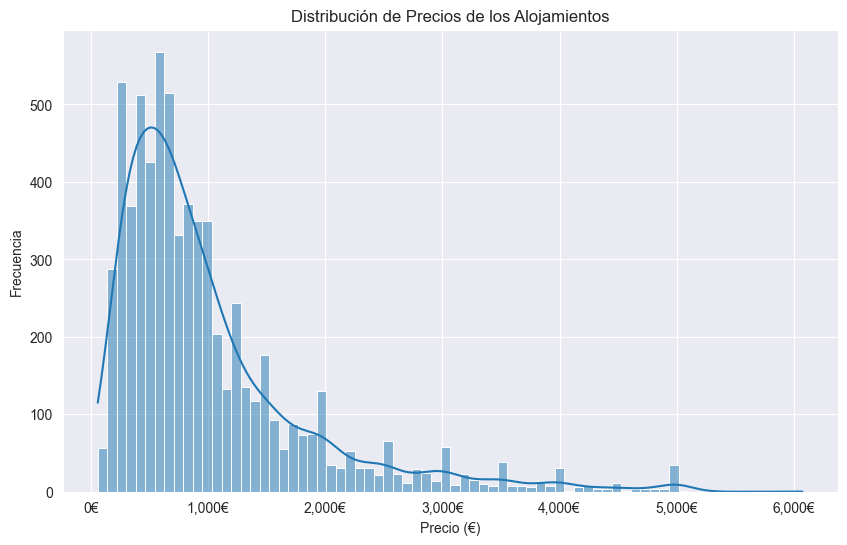

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True) #, color='blue')
plt.title('Distribución de Precios de los Alojamientos')
plt.xlabel('Precio (€)')
plt.ylabel('Frecuencia')
# Aplicar el formatter al eje X para mostrar el símbolo €
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(euro_formatter))
plt.show()

### 003-1 Distribución de Precios por Ciudad
    El precio puede variar dependiendo de la ubicación, y es importante identificar si hay ciudades más rentables que otras.

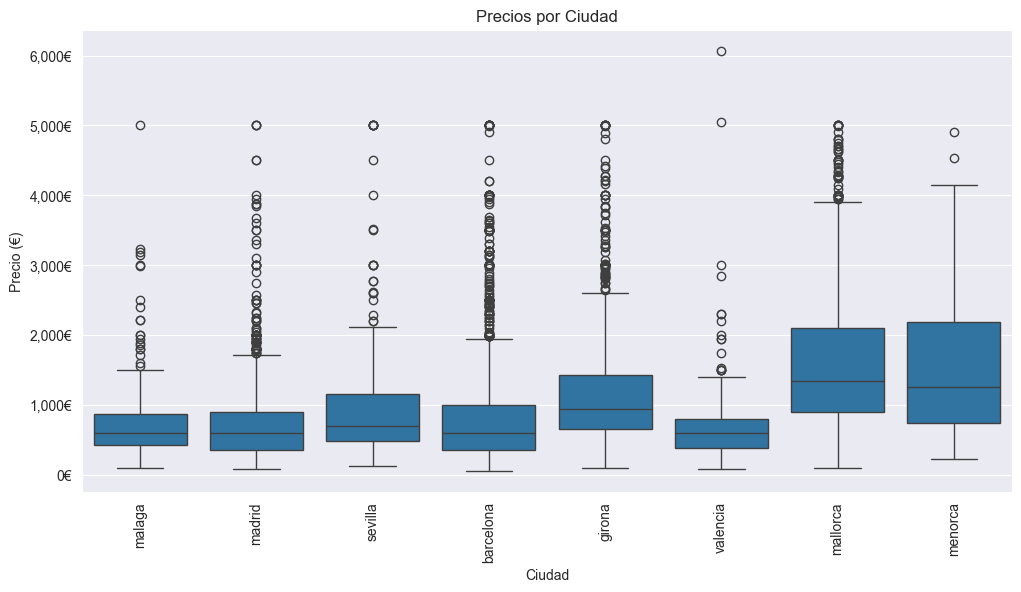

In [21]:
# Boxplot de precios por ciudad
plt.figure(figsize=(12, 6))
sns.boxplot(x='city', y='price', data=df)
plt.title('Precios por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Precio (€)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(euro_formatter))
plt.xticks(rotation=90)
plt.show()

### 003-2 Distribución de Precios por Tipo de Alojamiento
    El tipo de alojamiento también afecta la estrategia de precios

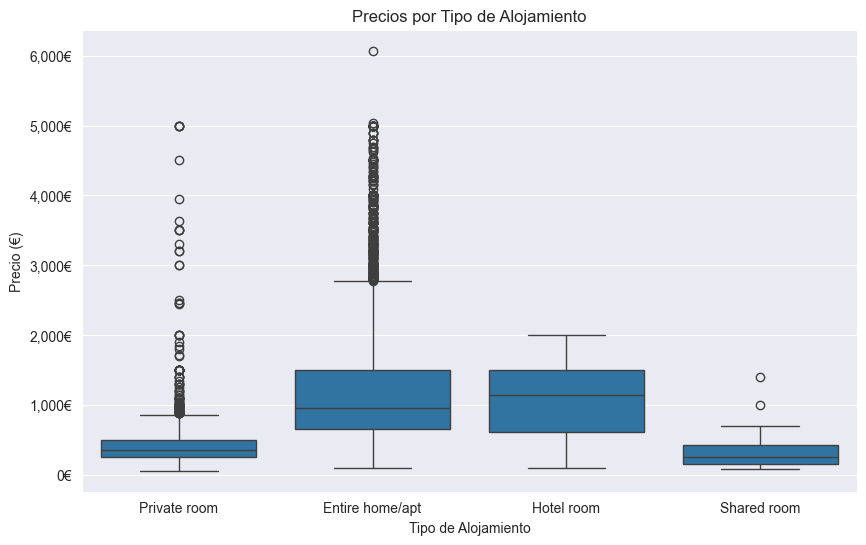

In [22]:
# Boxplot de precios por tipo de alojamiento
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Precios por Tipo de Alojamiento')
plt.xlabel('Tipo de Alojamiento')
plt.ylabel('Precio (€)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(euro_formatter))
plt.show()

### 003-3 Distribución de Precios por Número de Camas

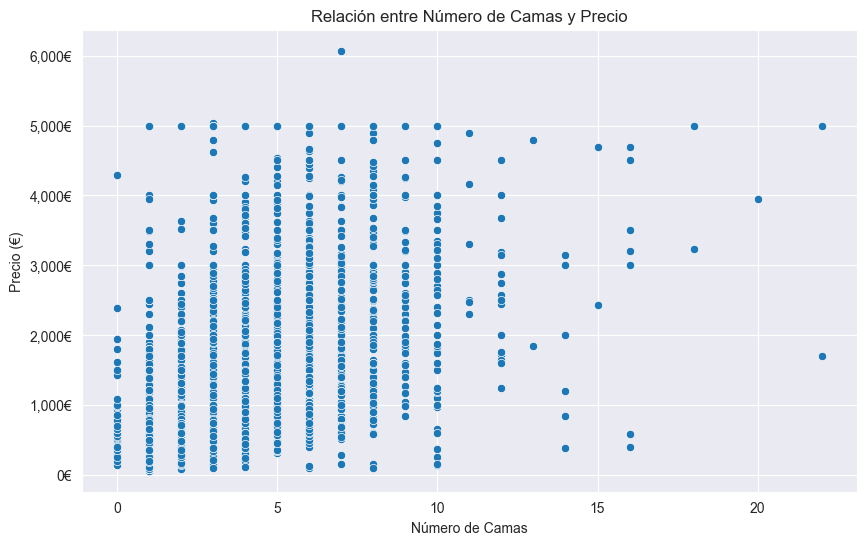

In [23]:
# Relación entre el número de camas y el precio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='beds', y='price', data=df)
plt.title('Relación entre Número de Camas y Precio')
plt.xlabel('Número de Camas')
plt.ylabel('Precio (€)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(euro_formatter))
plt.show()

### 003-4 Distribución de Precios por Número de Habitaciones

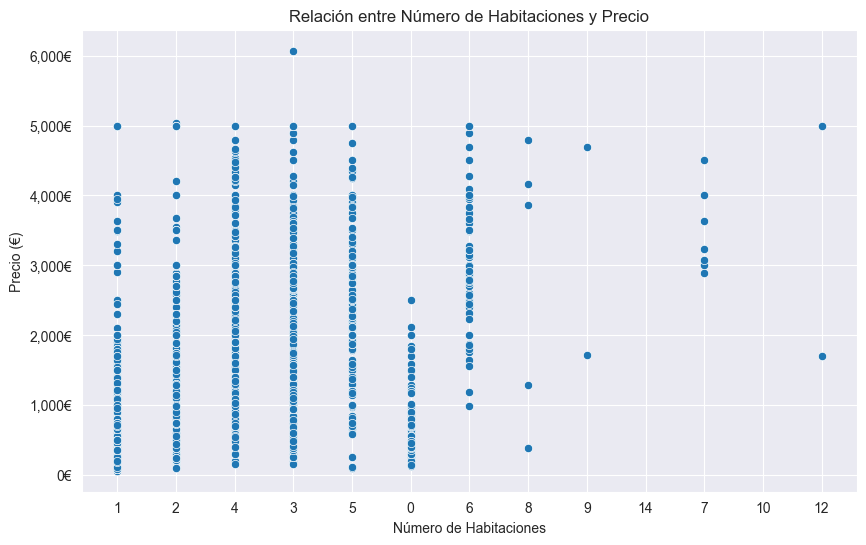

In [24]:
# Relación entre el número de habitaciones y el precio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bedrooms', y='price', data=df)
plt.title('Relación entre Número de Habitaciones y Precio')
plt.xlabel('Número de Habitaciones')
plt.ylabel('Precio (€)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(euro_formatter))
plt.show()

## 004 Disponibilidad y Estrategias de Marketing
    La disponibilidad es clave, ya que si un alojamiento está constantemente lleno, su visibilidad y estrategias de marketing podrían necesitar ajustes. Además, el análisis de la reserva instantánea también es crucial para optimizar las tasas de conversión.

#### 004-1 Distribución de Disponibilidad en 30 días

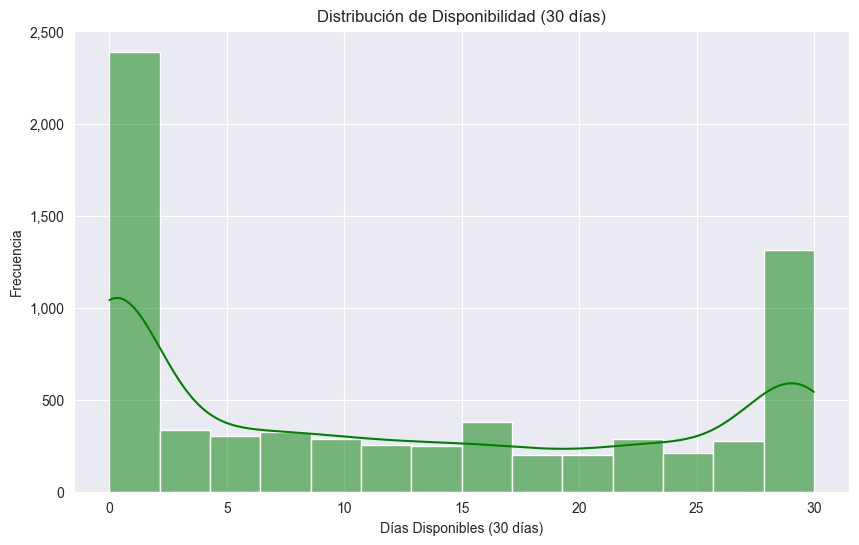

In [35]:
# Histograma de disponibilidad
plt.figure(figsize=(10, 6))
sns.histplot(df['availability_30'], kde=True, color='green')

plt.gca().yaxis.set_major_formatter(FuncFormatter(formato_miles))

plt.title('Distribución de Disponibilidad (30 días)')
plt.xlabel('Días Disponibles (30 días)')
plt.ylabel('Frecuencia')
plt.show()

#### 004-2 Distribución de Disponibilidad en 60 días

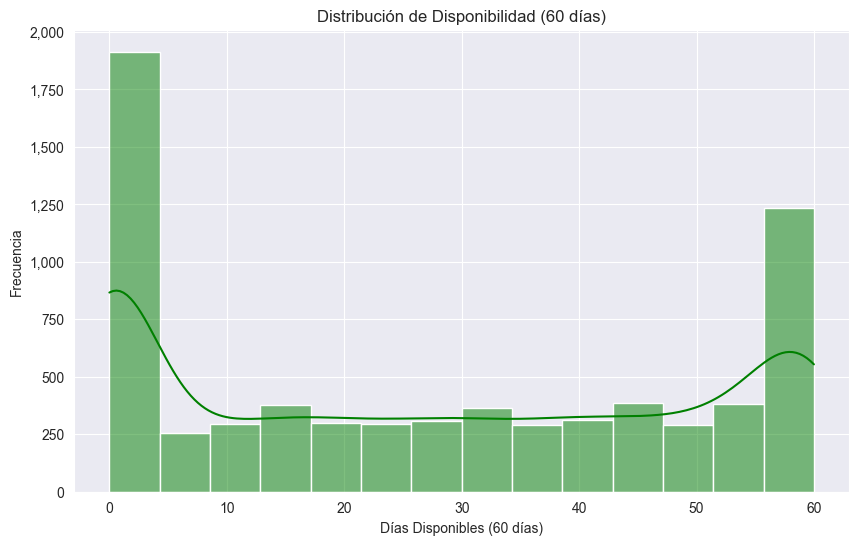

In [26]:
# Histograma de disponibilidad
plt.figure(figsize=(10, 6))
sns.histplot(df['availability_60'], kde=True, color='green')

plt.gca().yaxis.set_major_formatter(FuncFormatter(formato_miles))

plt.title('Distribución de Disponibilidad (60 días)')
plt.xlabel('Días Disponibles (60 días)')
plt.ylabel('Frecuencia')
plt.show()

#### 004-3 Distribución de Disponibilidad en 90 días

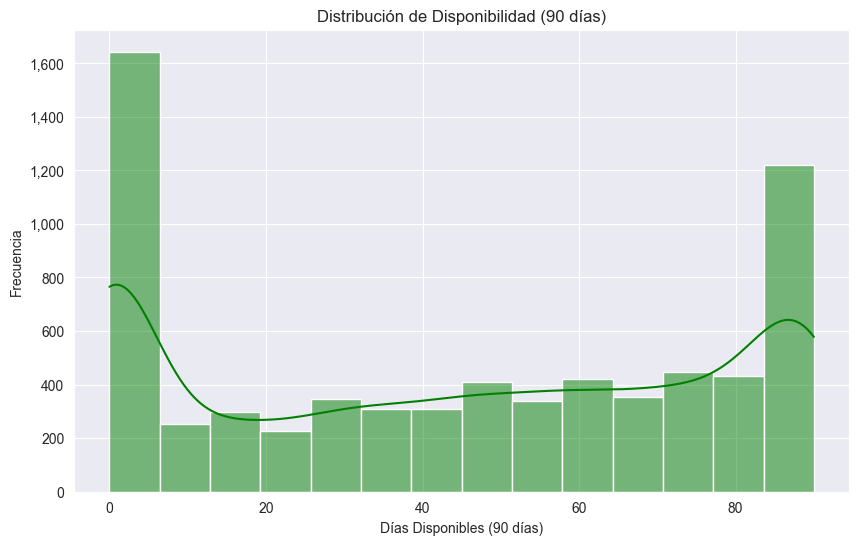

In [27]:
# Histograma de disponibilidad
plt.figure(figsize=(10, 6))
sns.histplot(df['availability_90'], kde=True, color='green')

plt.gca().yaxis.set_major_formatter(FuncFormatter(formato_miles))

plt.title('Distribución de Disponibilidad (90 días)')
plt.xlabel('Días Disponibles (90 días)')
plt.ylabel('Frecuencia')
plt.show()

#### 004-4 Distribución de Disponibilidad en 365 días

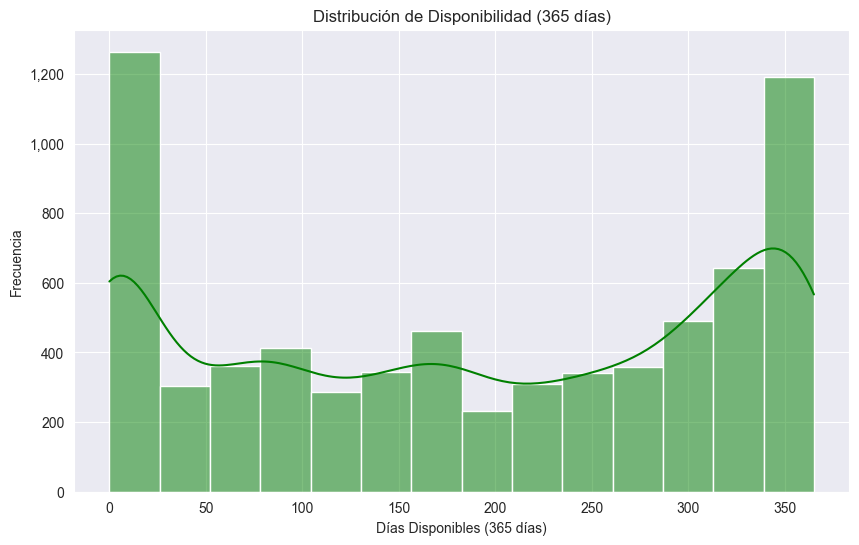

In [28]:
# Histograma de disponibilidad
plt.figure(figsize=(10, 6))
sns.histplot(df['availability_365'], kde=True, color='green')

plt.gca().yaxis.set_major_formatter(FuncFormatter(formato_miles))

plt.title('Distribución de Disponibilidad (365 días)')
plt.xlabel('Días Disponibles (365 días)')
plt.ylabel('Frecuencia')
plt.show()



## 005 Reserva Instantánea y Comunicación
    Verificar cuántos alojamientos permiten la reserva instantánea.
    La reserva instantánea es un factor clave en la experiencia del usuario. Si la mayoría de los alojamientos tienen esta opción, se puede centrar la comunicación en la conveniencia y rapidez del proceso.

### 005-1 Ver el porcentaje de alojamientos con reserva instantánea

In [29]:
instant_bookable_percentage = df['is_instant_bookable'].value_counts(normalize=True) * 100
print(instant_bookable_percentage)

is_instant_bookable
VERDADERO    53.42094
FALSO        46.57906
Name: proportion, dtype: float64


### 005-2 Gráfico de la distribución de alojamientos con reserva instantánea

C:\Users\Albert\AppData\Local\Temp\ipykernel_27312\1596701451.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_instant_bookable', data=df, palette='viridis')


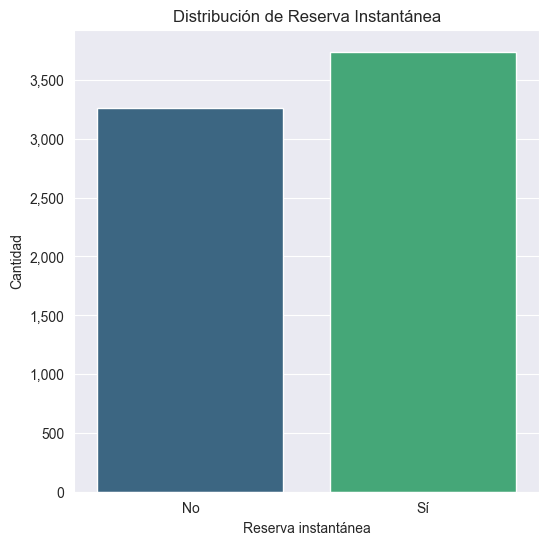

In [37]:
plt.figure(figsize=(6, 6))
sns.countplot(x='is_instant_bookable', data=df, palette='viridis')

plt.gca().yaxis.set_major_formatter(FuncFormatter(formato_miles))

plt.xlabel('Reserva instantánea')
plt.ylabel('Cantidad')
plt.title('Distribución de Reserva Instantánea')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

## 006 Análisis de Reseñas
    Las reseñas son un factor determinante en la decisión del cliente. Vamos a analizar tanto la cantidad de reseñas como la puntuación.

### 006-1 Número de Reseñas y Puntuaciones
    La cantidad de reseñas y la puntuación promedio pueden indicar la popularidad y calidad de los alojamientos.

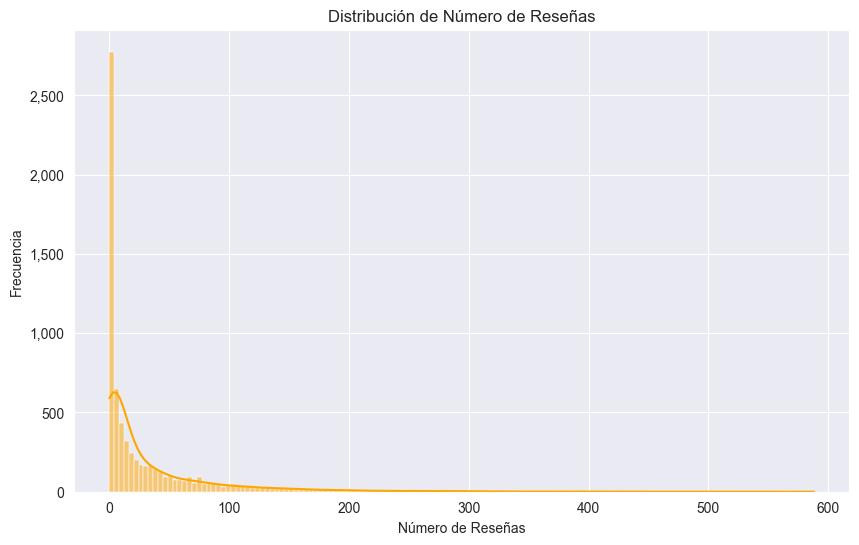

In [38]:
# Histograma de número de reseñas
plt.figure(figsize=(10, 6))
sns.histplot(df['number_of_reviews'], kde=True, color='orange')

plt.gca().yaxis.set_major_formatter(FuncFormatter(formato_miles))

plt.title('Distribución de Número de Reseñas')
plt.xlabel('Número de Reseñas')
plt.ylabel('Frecuencia')
plt.show()


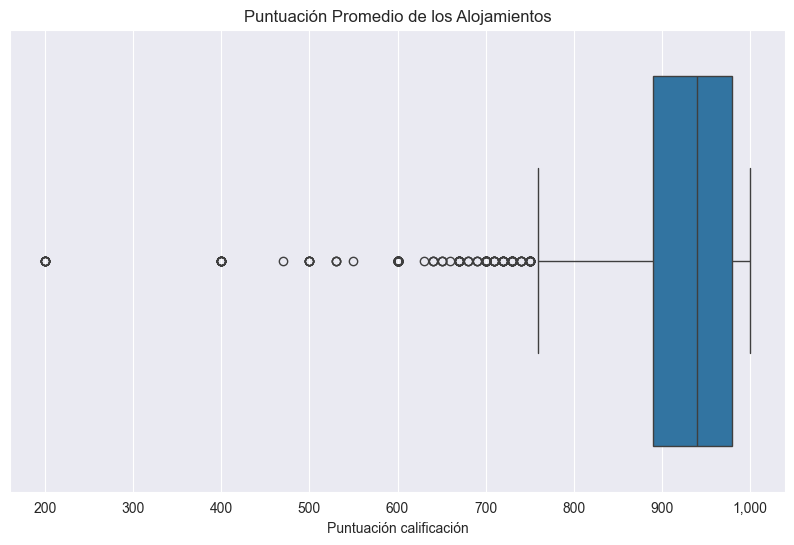

In [32]:
 # Boxplot de puntuaciones
plt.figure(figsize=(10, 6))
sns.boxplot(x='review_scores_rating', data=df)

plt.gca().xaxis.set_major_formatter(FuncFormatter(formato_miles))

plt.xlabel('Puntuación calificación')
plt.title('Puntuación Promedio de los Alojamientos')
plt.show()

### 006-2 Puntuaciones por Tipo de Alojamiento

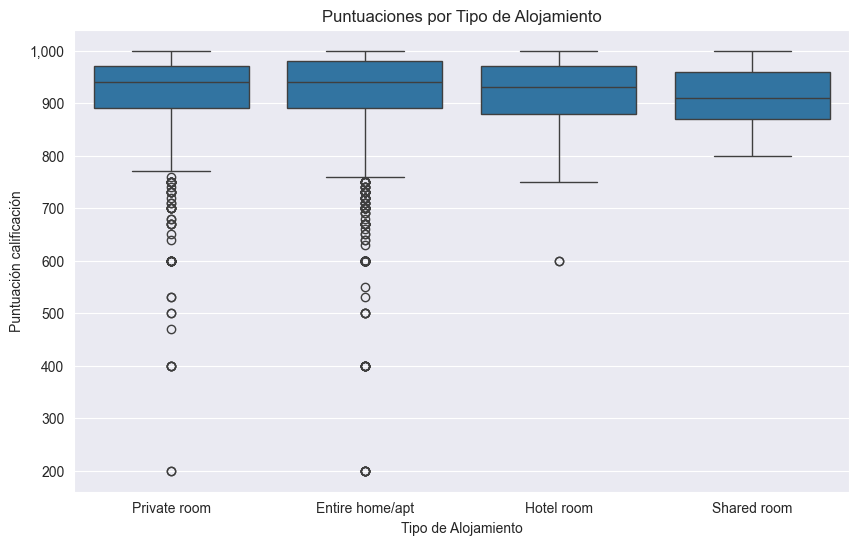

In [33]:
# Boxplot de puntuaciones por tipo de alojamiento
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='review_scores_rating', data=df)

plt.gca().yaxis.set_major_formatter(FuncFormatter(formato_miles))

plt.xlabel('Tipo de Alojamiento')
plt.ylabel('Puntuación calificación')
plt.title('Puntuaciones por Tipo de Alojamiento')
plt.show()